In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_csv("tomato_price.csv")
df

month_year  variety  rainfall  temperature  PH_of_soil  \
0       Jan-00        1       110           30         7.8   
1       Jan-00        0       146           35         6.8   
2       Mar-00        0       105           31         6.1   
3       Mar-00        1       199           29         7.9   
4       Apr-00        0       234           32         6.8   
..         ...      ...       ...          ...         ...   
282     Mar-23        1       229           32         6.7   
283     Mar-23        0       172           25         6.4   
284     Apr-23        0       202           22         6.5   
285     May-23        0       138           25         6.8   
286     Jun-23        0       205           29         7.4   

     transportation_cost  irrigation_taken_days seed_rate  fruiting_months  \
0                   1.38                      3       434                2   
1                   1.19                      3       452                1   
2                   1.18                      3       498                2   
3                   1.18                      3       401                2   
4                   1.43                      4       432                1   
..                   ...                    ...       ...              ...   
282                 1.17                      3       488                2   
283                 1.23                      4       420                2   
284                 1.19                      3       405                2   
285                 1.36                      4       412                2   
286                 1.43                      3       430                1   

     production_per_acre   ...  copper zinc  gibberllic_acid(ppm)  \
0                       8  ...       9   37                     9   
1                       8  ...      10   56                    13   
2                       9  ...       5   59                     5   
3                       8  ...      15   80                    14   
4                      11  ...      11   63                     8   
..                    ...  ...     ...  ...                   ...   
282                    11  ...      10   31                     9   
283                    10  ...      10   82                     7   
284                     8  ...       7   86                    11   
285                     9  ...       5   88                    19   
286                    10  ...      15   65                    15   

     metribuzin(kg/ha)  fluchloralin(kg/ha)  spraying_of_PCPA  IAA  \
0                 0.35                 1.25                50   50   
1                 0.35                 1.25                50   50   
2                 0.35                 1.25                50   50   
3                 0.35                 1.25                50   50   
4                 0.35                 1.25                50   50   
..                 ...                  ...               ...  ...   
282               0.35                 1.25                50   50   
283               0.35                 1.25                50   50   
284               0.35                 1.25                50   50   
285               0.35                 1.25                50   50   
286               0.35                 1.25                50   50   

     spraying_of_cypernethrin  distance_required_for_tomato  price  
0                           3                            26     39  
1                           3                            35     21  
2                           3                            30     37  
3                           3                            32     22  
4                           3                            36     49  
..                        ...                           ...    ...  
282                         3                            32     27  
283                         3                            28     32  
284                         4  

Data Cleaning

In [ ]:
import math
median_seed_rate = math.floor(df.seed_rate.median())
median_seed_rate

450

In [ ]:
df.seed_rate = df.seed_rate.fillna(median_seed_rate)
df

month_year  variety  rainfall  temperature  PH_of_soil  \
0       Jan-00        1       110           30         7.8   
1       Jan-00        0       146           35         6.8   
2       Mar-00        0       105           31         6.1   
3       Mar-00        1       199           29         7.9   
4       Apr-00        0       234           32         6.8   
..         ...      ...       ...          ...         ...   
282     Mar-23        1       229           32         6.7   
283     Mar-23        0       172           25         6.4   
284     Apr-23        0       202           22         6.5   
285     May-23        0       138           25         6.8   
286     Jun-23        0       205           29         7.4   

     transportation_cost  irrigation_taken_days seed_rate  fruiting_months  \
0                   1.38                      3       434                2   
1                   1.19                      3       452                1   
2                   1.18                      3       498                2   
3                   1.18                      3       401                2   
4                   1.43                      4       432                1   
..                   ...                    ...       ...              ...   
282                 1.17                      3       488                2   
283                 1.23                      4       420                2   
284                 1.19                      3       405                2   
285                 1.36                      4       412                2   
286                 1.43                      3       430                1   

     production_per_acre   ...  copper zinc  gibberllic_acid(ppm)  \
0                       8  ...       9   37                     9   
1                       8  ...      10   56                    13   
2                       9  ...       5   59                     5   
3                       8  ...      15   80                    14   
4                      11  ...      11   63                     8   
..                    ...  ...     ...  ...                   ...   
282                    11  ...      10   31                     9   
283                    10  ...      10   82                     7   
284                     8  ...       7   86                    11   
285                     9  ...       5   88                    19   
286                    10  ...      15   65                    15   

     metribuzin(kg/ha)  fluchloralin(kg/ha)  spraying_of_PCPA  IAA  \
0                 0.35                 1.25                50   50   
1                 0.35                 1.25                50   50   
2                 0.35                 1.25                50   50   
3                 0.35                 1.25                50   50   
4                 0.35                 1.25                50   50   
..                 ...                  ...               ...  ...   
282               0.35                 1.25                50   50   
283               0.35                 1.25                50   50   
284               0.35                 1.25                50   50   
285               0.35                 1.25                50   50   
286               0.35                 1.25                50   50   

     spraying_of_cypernethrin  distance_required_for_tomato  price  
0                           3                            26     39  
1                           3                            35     21  
2                           3                            30     37  
3                           3                            32     22  
4                           3                            36     49  
..                        ...                           ...    ...  
282                         3                            32     27  
283                         3                            28     32  
284                         4  

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[["variety","rainfall","temperature","PH_of_soil","transportation_cost" ,"distance_required_for_tomato"] ],df.price)

LinearRegression()

In [ ]:
reg.coef_

array([-1.01198322,  0.00739688, -0.03962698, -1.64837685,  5.66980224,
       -0.18711709])

In [ ]:
reg.intercept_

45.359388282981996

In [ ]:
reg.predict([[0,210,28,6.2,1.38,29,]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37.98117235])

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(df[["rainfall","temperature","PH_of_soil","transportation_cost","irrigation_taken_days","storage_life(days)","transplantating(days)","water_necessary_days","nitrogen","phosphorus","potassium" ,"calcium" ,"magnesium " ,"sulphur","manganesa"  ,"iron" ,"boron" , "copper" ,"zinc" ,"gibberllic_acid(ppm)" ,"metribuzin(kg/ha)","fluchloralin(kg/ha)" ,"spraying_of_PCPA" ,"IAA","spraying_of_cypernethrin"]],df.price)

LinearRegression()

In [ ]:
reg.coef_

array([ 5.87631359e-03, -5.75562783e-02, -1.48907439e+00,  5.81312894e+00,
        3.58644392e-01, -1.16699355e-01, -2.16123957e-01,  3.47064367e-01,
       -8.13420856e-01,  7.60124256e-01,  1.09084918e+00,  1.02251979e+00,
       -4.17427782e+00,  4.64091793e-01,  4.44542201e-03, -1.94285195e-03,
        5.20369316e-02, -6.20699215e-02, -2.78971271e-02, -8.72534043e-03,
        1.26754937e-29,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.36719858e+00])

In [ ]:
reg.intercept_

54.51680003383922

In [ ]:
reg.predict([[120,21,6.6,1.28,3,9,77,14,4.7,0.45,3.9,1.67,0.5,0.9,389,265,45,9,67,15,0.35,1.25,50,50,3]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([37.57648939])

EDA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='month_year', ylabel='price'>

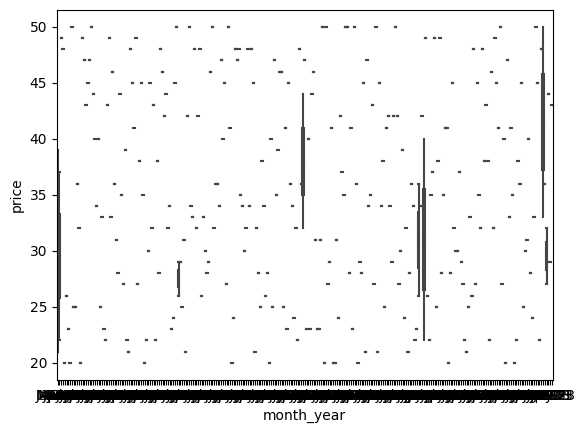

In [ ]:
sns.boxplot(x='month_year', y='price', data=df)

<Axes: xlabel='temperature', ylabel='price'>

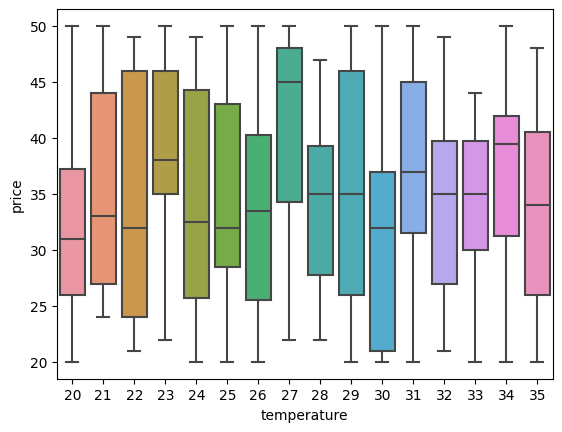

In [ ]:
sns.boxplot(x='temperature', y='price', data=df)

<Axes: xlabel='rainfall', ylabel='price'>

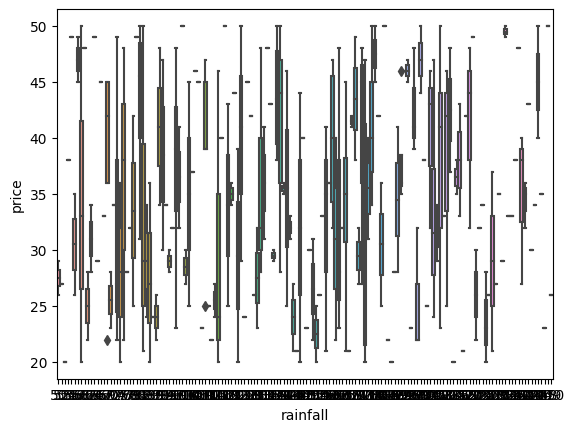

In [ ]:
sns.boxplot(x='rainfall', y='price', data=df)

In [ ]:
sns.violinplot(x='temperature', y='storage_life(days)', data=df)

<Axes: xlabel='temperature', ylabel='storage_life(days)'>

In [ ]:
sns.violinplot(x='month_year', y='water_necessary_days', data=df)

<Axes: xlabel='month_year', ylabel='water_necessary_days'>

Data Visuvalization

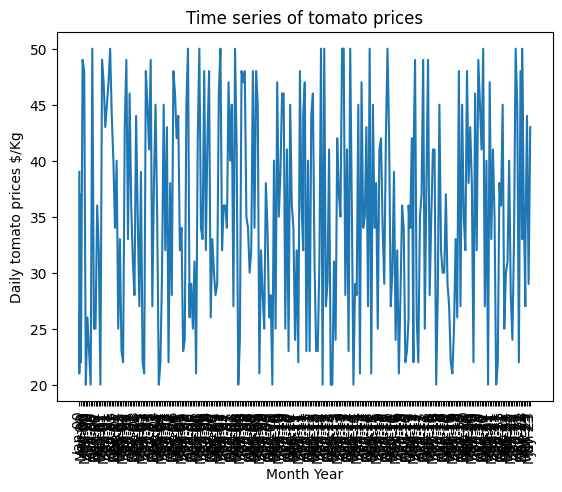

In [ ]:
plt.plot(df["month_year"],df["price"])
plt.xlabel("Month Year")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices")
plt.xticks(rotation=90)
plt.show()

In [ ]:
plt.plot(df["month_year"],df["rainfall"])
plt.xlabel("Month_Year")
plt.ylabel("Rainfall")
plt.show()

In [ ]:
plt.plot(df["temperature"],df["price"])
plt.xlabel("Temperature")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices ")
plt.show()

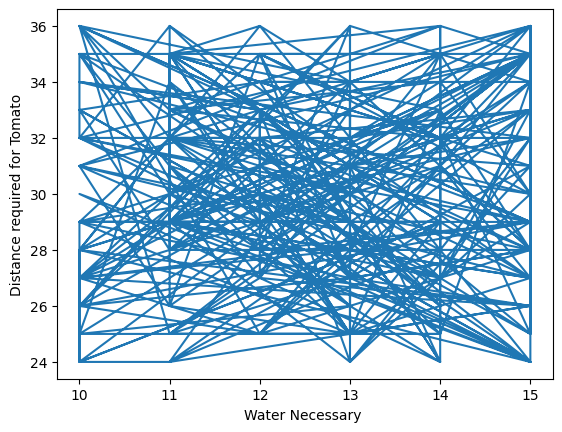

In [ ]:
plt.plot(df["water_necessary_days"],df["distance_required_for_tomato"])
plt.xlabel("Water Necessary ")
plt.ylabel("Distance required for Tomato")
plt.show()

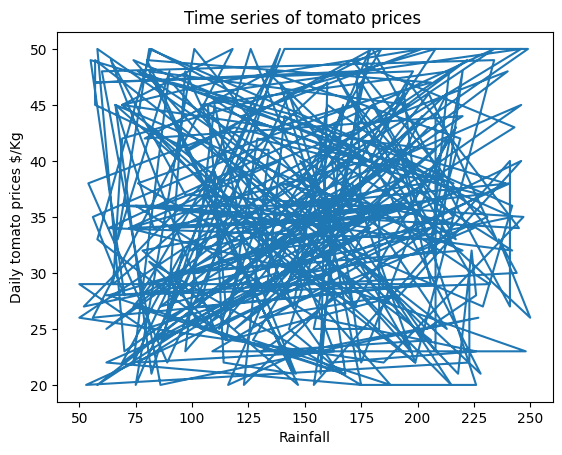

In [ ]:
plt.plot(df["rainfall"],df["price"])
plt.xlabel("Rainfall")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices ")
plt.show()

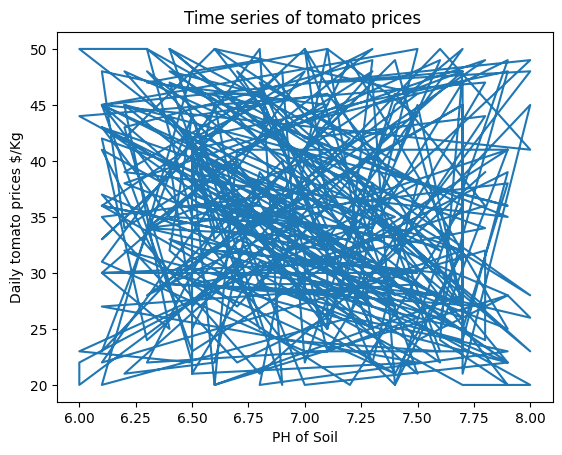

In [ ]:
plt.plot(df["PH_of_soil"],df["price"])
plt.xlabel("PH of Soil")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices ")
plt.show()

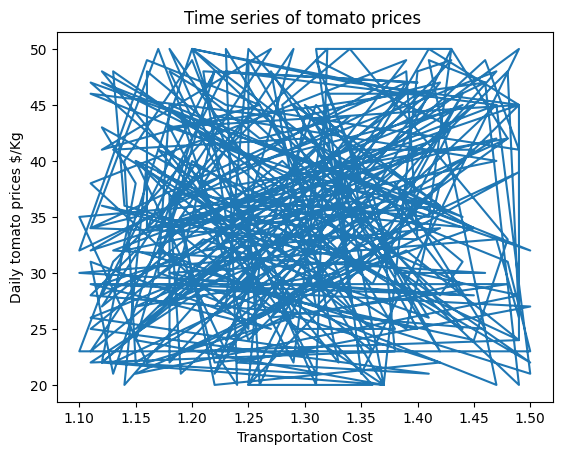

In [ ]:
plt.plot(df["transportation_cost"],df["price"])
plt.xlabel("Transportation Cost")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices ")
plt.show()

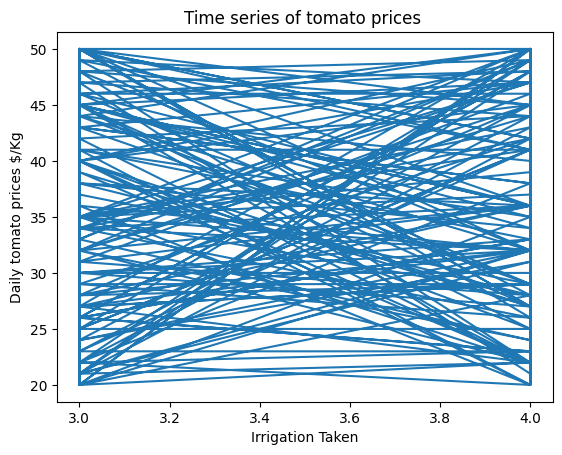

In [ ]:
plt.plot(df["irrigation_taken_days"],df["price"])
plt.xlabel("Irrigation Taken")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices ")
plt.show()

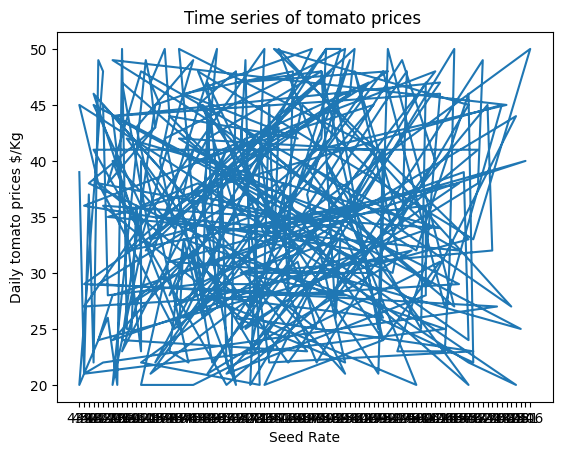

In [ ]:
plt.plot(df["seed_rate"],df["price"])
plt.xlabel("Seed Rate")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices ")
plt.show()

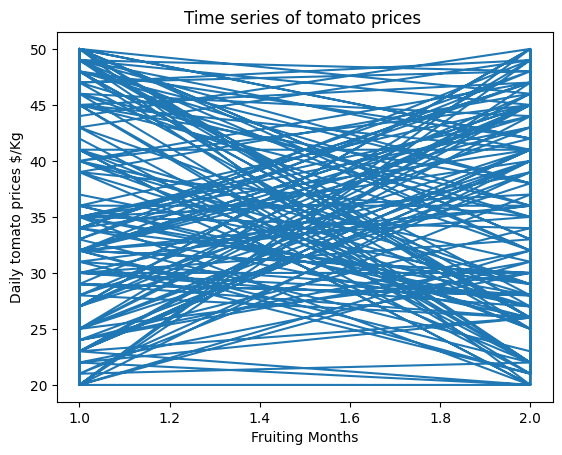

In [ ]:
plt.plot(df["fruiting_months"],df["price"])
plt.xlabel("Fruiting Months")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices ")
plt.show()

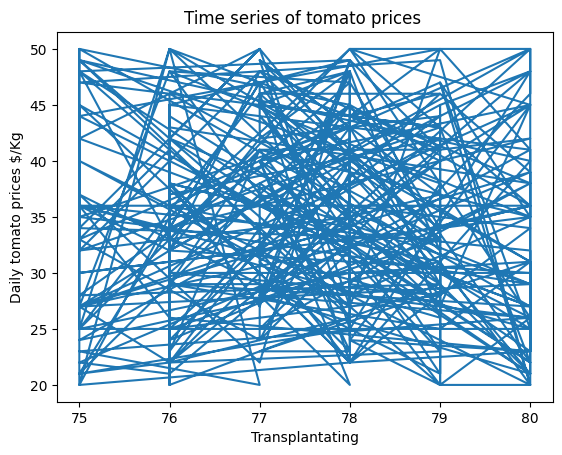

In [ ]:
plt.plot(df["transplantating(days)"],df["price"])
plt.xlabel("Transplantating")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices ")
plt.show()

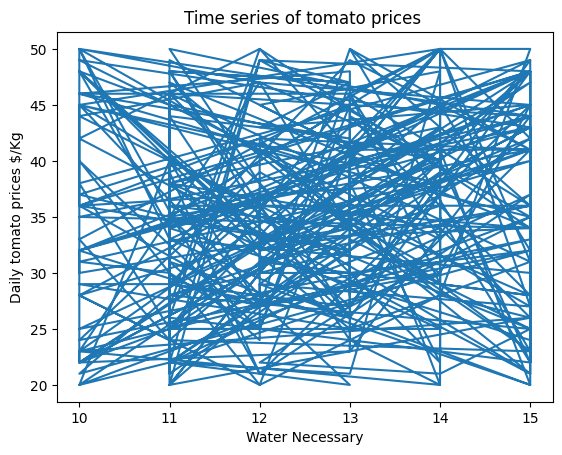

In [ ]:
plt.plot(df["water_necessary_days"],df["price"])
plt.xlabel("Water Necessary")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices ")
plt.show()

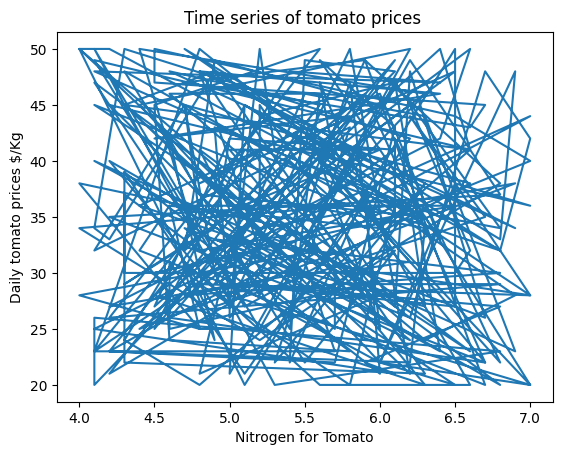

In [ ]:
plt.plot(df["nitrogen"],df["price"])
plt.xlabel("Nitrogen for Tomato")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices ")
plt.show()

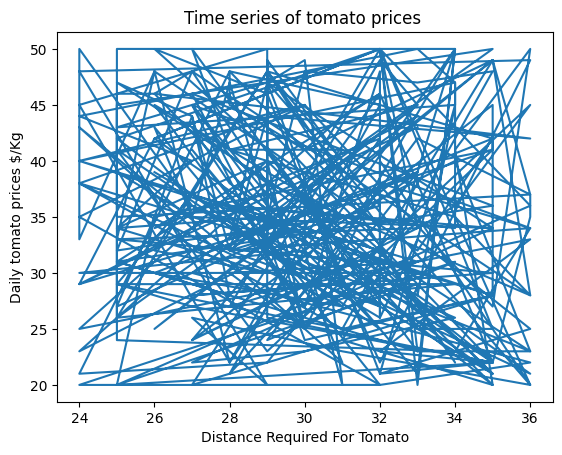

In [ ]:
plt.plot(df["distance_required_for_tomato"],df["price"])
plt.xlabel("Distance Required For Tomato")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices ")
plt.show()

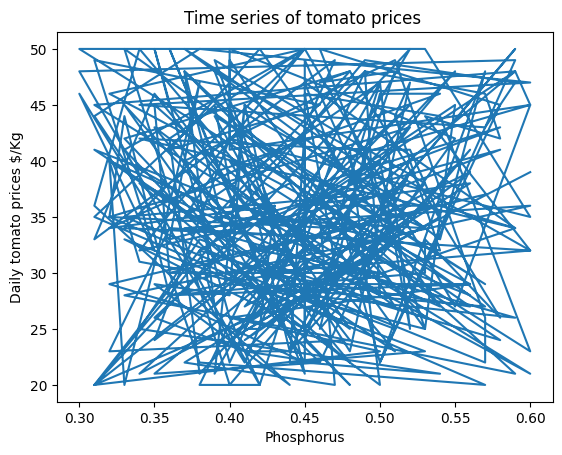

In [ ]:
plt.plot(df["phosphorus"],df["price"])
plt.xlabel("Phosphorus")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices ")
plt.show()

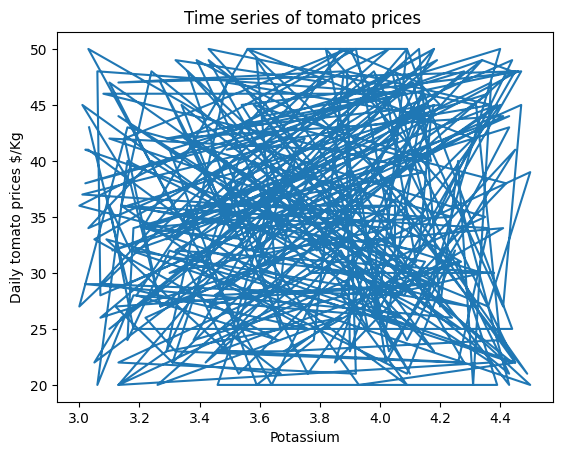

In [ ]:
plt.plot(df["potassium"],df["price"])
plt.xlabel("Potassium")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices ")
plt.show()

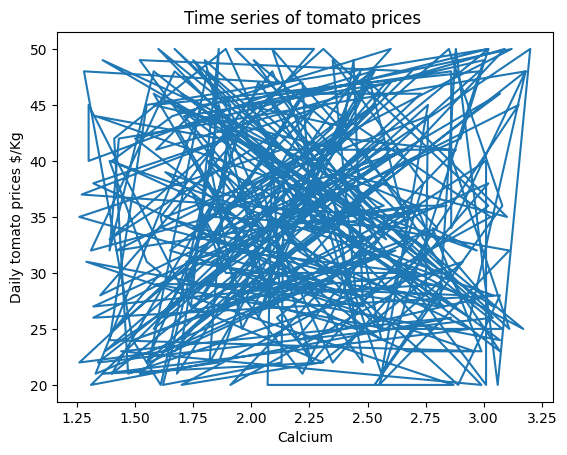

In [ ]:
plt.plot(df["calcium"],df["price"])
plt.xlabel("Calcium")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices ")
plt.show()

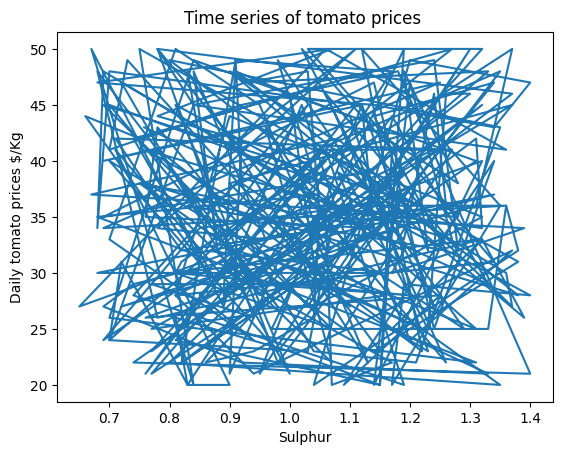

In [ ]:
plt.plot(df["sulphur"],df["price"])
plt.xlabel("Sulphur")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices ")
plt.show()

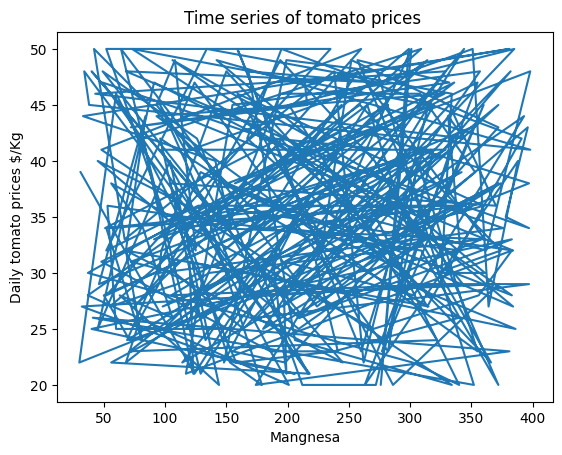

In [ ]:
plt.plot(df["manganesa"],df["price"])
plt.xlabel("Mangnesa")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices ")
plt.show()

In [ ]:
plt.plot(df["iron"],df["price"])
plt.xlabel("Iron")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices ")
plt.show()

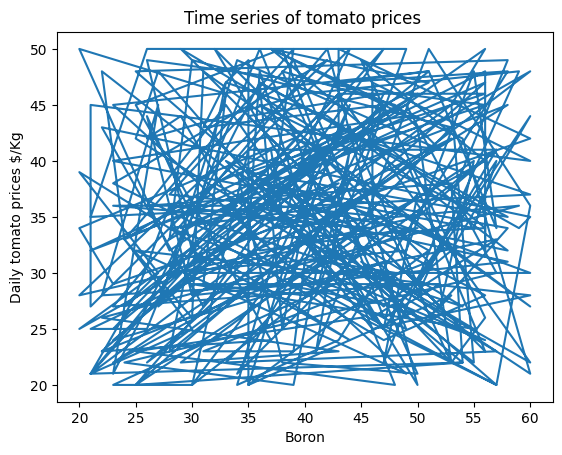

In [ ]:
plt.plot(df["boron"],df["price"])
plt.xlabel("Boron")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices ")
plt.show()

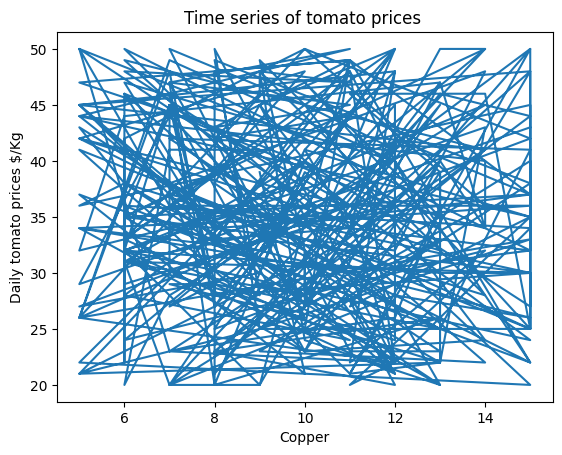

In [ ]:
plt.plot(df["copper"],df["price"])
plt.xlabel("Copper")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices ")
plt.show()

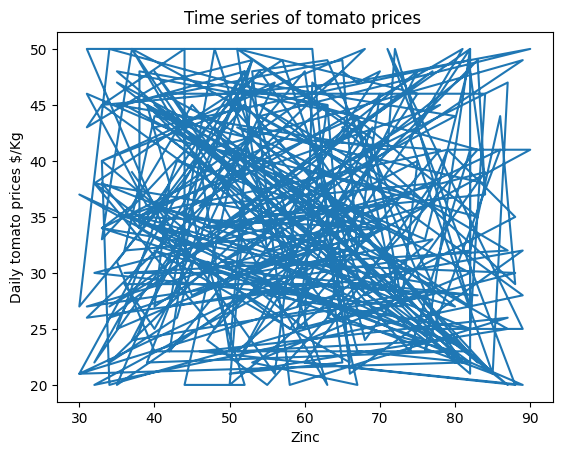

In [ ]:
plt.plot(df["zinc"],df["price"])
plt.xlabel("Zinc")
plt.ylabel("Daily tomato prices $/Kg")
plt.title("Time series of tomato prices ")
plt.show()